# Dinámica de Consenso

**Eduardo Carrasco**

## Automata Celular Unidimensional:

### Estados Iniciales: [-1, 1]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# determinamos el estado inicial en forma aleatoria, con valores binarios y rango (tamaño de la grilla)
def inicial_random(tamano):
    np.random.seed(218)
    estado_inicial_r = np.random.choice([-1, 1], size=(tamano), p=[0.5, 0.5])
    return estado_inicial_r

In [ ]:
# con esta función determinamos un estado inicial seteado al centro.
def inicial_centrado(tamano):
    estado_inicial_s = [-1] * tamano
    estado_inicial_s[tamano // 2] = 1
    return estado_inicial_s

### Definición vecinos:

In [ ]:
# Observar Ambos Vecinos
def vecinos(estado, i, r):
    tamano = len(estado)
    estado_ext = np.pad(estado, pad_width=r, mode='wrap')
    vecindad = [estado_ext[i + r + j] for j in range(-r, r + 1)]
    return vecindad

_______

____

### Definición de Reglas:

In [ ]:
def regla_totalistica(vecindad):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return vecindad[len(vecindad)//2]

### Cálculo Siguiente Generación:

In [ ]:
def siguiente_generacion(estado, r):
    tamano = len(estado)
    nueva_generacion = np.zeros(tamano, dtype=int)

    for i in range(tamano):
        vecindad = vecinos(estado, i, r)
        nueva_generacion[i] = regla_totalistica(vecindad)

    return nueva_generacion

In [ ]:
def automata_celular(r, tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1], r)

    return automata

In [ ]:
def visualizar_automata(automata):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.show()

In [ ]:
def guardar_automata(automata, nombre_archivo="automata.png", ruta_carpeta="0. ACU/0. ACU_combinatoria"):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.title(f"Radio: {r}\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}\nSuma Vecinos: {suma_vecinos}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    
    # Crear el nombre del archivo utilizando las variables
    nombre_archivo = f"UCA_R{r}_{tamano}_r{suma_vecinos}.png"
    
    # Guardar la imagen en la misma carpeta del script con el nombre especificado
    plt.savefig(ruta_carpeta + nombre_archivo, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()

### Implementación y seteo de condiciones:

In [ ]:
# Parámetros
r = 2
tamano = 1000
generaciones = 1200
estado_inicial = inicial_random(tamano) #centrado o random
#estado_inicial = [-1, -1, -1, -1, 1, 1, 1, 1, 1, 1]

# Ejecución del autómata celular
automata = automata_celular(r, tamano, generaciones, estado_inicial)
visualizar_automata(automata)
#guardar_automata(automata, "mi_automata.png", "0. ACU/")

In [ ]:
automata

_____

_____

### Aplicación en múltiples estados: 

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

def todas_las_combinaciones(tamano):
    return list(itertools.product([-1, 1], repeat=tamano))

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

def vecinos(estado, i, r):
    tamano = len(estado)
    estado_ext = np.pad(estado, pad_width=r, mode='wrap')
    vecindad = [estado_ext[i + r + j] for j in range(-r, r + 1)]
    return vecindad

In [ ]:
def regla_totalistica(vecindad):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return vecindad[len(vecindad)//2]

In [ ]:
def siguiente_generacion(estado, r):
    tamano = len(estado)
    nueva_generacion = np.zeros(tamano, dtype=int)

    for i in range(tamano):
        vecindad = vecinos(estado, i, r)
        nueva_generacion[i] = regla_totalistica(vecindad)

    return nueva_generacion

In [ ]:
def automata_celular(r, tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1], r)

    return automata, automata[-1]

In [ ]:
def guardar_automata(automata, nombre_archivo="automata.png", ruta_carpeta=""):
    plt.imshow(automata, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
    plt.title(f"Radio: {r}\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')

    # Crear el nombre del archivo utilizando las variables
    nombre_archivo = f"UCA_R{r}_s{tamano}_{nombre_archivo}"

    # Guardar la imagen en la misma carpeta del script con el nombre especificado
    plt.savefig(ruta_carpeta + nombre_archivo, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close()

In [ ]:
def magnetizacion(automata):
    return np.mean(automata)

def magnetizacion_inicial(automata):
    return magnetizacion(automata[0])

def magnetizacion_final(automata):
    return magnetizacion(automata[-1])

In [ ]:
tamano = 5
estados = todas_las_combinaciones(tamano)
r = 1
generaciones = 12

for estado in estados:
    automata, _ = automata_celular(r, tamano, generaciones, estado)
    nombre_archivo = f"{''.join(map(str, estado))}.png"
    #guardar_automata(automata, nombre_archivo)

In [ ]:
estados_finales = [(-1, -1, -1, -1, 1, 1, 1, 1, 1, 1),
 (-1, -1, -1, 1, -1, 1, 1, 1, 1, 1),
 (-1, -1, -1, 1, 1, -1, 1, 1, 1, 1),
 (-1, -1, -1, 1, 1, 1, -1, 1, 1, 1),
 (-1, -1, -1, 1, 1, 1, 1, -1, 1, 1),
 (-1, -1, -1, 1, 1, 1, 1, 1, -1, 1),
 (-1, -1, -1, 1, 1, 1, 1, 1, 1, -1),
 (-1, -1, -1, 1, 1, 1, 1, 1, 1, 1),
 (-1, -1, 1, -1, -1, 1, 1, 1, 1, 1),
 (-1, -1, 1, -1, 1, -1, 1, 1, 1, 1),
 (-1, -1, 1, -1, 1, 1, 1, 1, -1, 1),
 (-1, -1, 1, -1, 1, 1, 1, 1, 1, -1),
 (-1, -1, 1, 1, -1, 1, 1, 1, 1, -1),
 (-1, -1, 1, 1, 1, -1, 1, 1, 1, -1),
 (-1, -1, 1, 1, 1, 1, -1, 1, -1, 1),
 (-1, -1, 1, 1, 1, 1, -1, 1, 1, -1),
 (-1, -1, 1, 1, 1, 1, 1, -1, -1, 1),
 (-1, -1, 1, 1, 1, 1, 1, -1, 1, -1),
 (-1, -1, 1, 1, 1, 1, 1, 1, -1, -1),
 (-1, -1, 1, 1, 1, 1, 1, 1, 1, -1),
 (-1, 1, -1, -1, -1, 1, 1, 1, 1, 1),
 (-1, 1, -1, -1, 1, -1, 1, 1, 1, 1),
 (-1, 1, -1, -1, 1, 1, 1, 1, -1, 1),
 (-1, 1, -1, -1, 1, 1, 1, 1, 1, -1),
 (-1, 1, -1, 1, -1, -1, 1, 1, 1, 1),
 (-1, 1, -1, 1, -1, 1, 1, 1, 1, -1),
 (-1, 1, -1, 1, 1, 1, 1, -1, -1, 1),
 (-1, 1, -1, 1, 1, 1, 1, -1, 1, -1),
 (-1, 1, -1, 1, 1, 1, 1, 1, -1, -1),
 (-1, 1, 1, -1, -1, -1, 1, 1, 1, 1),
 (-1, 1, 1, -1, 1, 1, 1, 1, -1, -1),
 (-1, 1, 1, 1, -1, -1, -1, 1, 1, 1),
 (-1, 1, 1, 1, -1, 1, 1, 1, -1, -1),
 (-1, 1, 1, 1, 1, -1, -1, -1, 1, 1),
 (-1, 1, 1, 1, 1, -1, -1, 1, -1, 1),
 (-1, 1, 1, 1, 1, -1, 1, -1, -1, 1),
 (-1, 1, 1, 1, 1, -1, 1, -1, 1, -1),
 (-1, 1, 1, 1, 1, -1, 1, 1, -1, -1),
 (-1, 1, 1, 1, 1, 1, -1, -1, -1, 1),
 (-1, 1, 1, 1, 1, 1, -1, -1, 1, -1),
 (-1, 1, 1, 1, 1, 1, -1, 1, -1, -1),
 (-1, 1, 1, 1, 1, 1, 1, -1, -1, -1),
 (-1, 1, 1, 1, 1, 1, 1, 1, -1, -1),
 (1, -1, -1, -1, -1, 1, 1, 1, 1, 1),
 (1, -1, -1, -1, 1, -1, 1, 1, 1, 1),
 (1, -1, -1, -1, 1, 1, -1, 1, 1, 1),
 (1, -1, -1, -1, 1, 1, 1, -1, 1, 1),
 (1, -1, -1, -1, 1, 1, 1, 1, -1, 1),
 (1, -1, -1, -1, 1, 1, 1, 1, 1, -1),
 (1, -1, -1, -1, 1, 1, 1, 1, 1, 1),
 (1, -1, -1, 1, -1, -1, 1, 1, 1, 1),
 (1, -1, -1, 1, -1, 1, -1, 1, 1, 1),
 (1, -1, -1, 1, -1, 1, 1, 1, 1, -1),
 (1, -1, -1, 1, 1, 1, 1, -1, 1, -1),
 (1, -1, -1, 1, 1, 1, 1, 1, -1, -1),
 (1, -1, 1, -1, -1, -1, 1, 1, 1, 1),
 (1, -1, 1, -1, -1, 1, -1, 1, 1, 1),
 (1, -1, 1, -1, -1, 1, 1, 1, 1, -1),
 (1, -1, 1, -1, 1, -1, -1, 1, 1, 1),
 (1, -1, 1, -1, 1, 1, 1, 1, -1, -1),
 (1, -1, 1, 1, -1, -1, -1, 1, 1, 1),
 (1, -1, 1, 1, 1, -1, -1, -1, 1, 1),
 (1, -1, 1, 1, 1, 1, -1, -1, -1, 1),
 (1, -1, 1, 1, 1, 1, -1, -1, 1, -1),
 (1, -1, 1, 1, 1, 1, -1, 1, -1, -1),
 (1, -1, 1, 1, 1, 1, 1, -1, -1, -1),
 (1, 1, -1, -1, -1, -1, 1, 1, 1, 1),
 (1, 1, -1, -1, -1, 1, -1, 1, 1, 1),
 (1, 1, -1, -1, -1, 1, 1, -1, 1, 1),
 (1, 1, -1, -1, -1, 1, 1, 1, -1, 1),
 (1, 1, -1, -1, -1, 1, 1, 1, 1, -1),
 (1, 1, -1, -1, -1, 1, 1, 1, 1, 1),
 (1, 1, -1, -1, 1, -1, -1, 1, 1, 1),
 (1, 1, -1, -1, 1, -1, 1, -1, 1, 1),
 (1, 1, -1, 1, -1, -1, -1, 1, 1, 1),
 (1, 1, -1, 1, -1, -1, 1, -1, 1, 1),
 (1, 1, -1, 1, -1, 1, -1, -1, 1, 1),
 (1, 1, -1, 1, 1, -1, -1, -1, 1, 1),
 (1, 1, -1, 1, 1, 1, -1, -1, -1, 1),
 (1, 1, -1, 1, 1, 1, 1, -1, -1, -1),
 (1, 1, 1, -1, -1, -1, -1, 1, 1, 1),
 (1, 1, 1, -1, -1, -1, 1, -1, 1, 1),
 (1, 1, 1, -1, -1, -1, 1, 1, -1, 1),
 (1, 1, 1, -1, -1, -1, 1, 1, 1, -1),
 (1, 1, 1, -1, -1, -1, 1, 1, 1, 1),
 (1, 1, 1, -1, -1, 1, -1, -1, 1, 1),
 (1, 1, 1, -1, -1, 1, -1, 1, -1, 1),
 (1, 1, 1, -1, 1, -1, -1, -1, 1, 1),
 (1, 1, 1, -1, 1, -1, -1, 1, -1, 1),
 (1, 1, 1, -1, 1, -1, 1, -1, -1, 1),
 (1, 1, 1, -1, 1, 1, -1, -1, -1, 1),
 (1, 1, 1, -1, 1, 1, 1, -1, -1, -1),
 (1, 1, 1, 1, -1, -1, -1, -1, 1, 1),
 (1, 1, 1, 1, -1, -1, -1, 1, -1, 1),
 (1, 1, 1, 1, -1, -1, -1, 1, 1, -1),
 (1, 1, 1, 1, -1, -1, -1, 1, 1, 1),
 (1, 1, 1, 1, -1, -1, 1, -1, -1, 1),
 (1, 1, 1, 1, -1, -1, 1, -1, 1, -1),
 (1, 1, 1, 1, -1, 1, -1, -1, -1, 1),
 (1, 1, 1, 1, -1, 1, -1, -1, 1, -1),
 (1, 1, 1, 1, -1, 1, -1, 1, -1, -1),
 (1, 1, 1, 1, -1, 1, 1, -1, -1, -1),
 (1, 1, 1, 1, 1, -1, -1, -1, -1, 1),
 (1, 1, 1, 1, 1, -1, -1, -1, 1, -1),
 (1, 1, 1, 1, 1, -1, -1, -1, 1, 1),
 (1, 1, 1, 1, 1, -1, -1, 1, -1, -1),
 (1, 1, 1, 1, 1, -1, 1, -1, -1, -1),
 (1, 1, 1, 1, 1, 1, -1, -1, -1, -1),
 (1, 1, 1, 1, 1, 1, -1, -1, -1, 1),
 (1, 1, 1, 1, 1, 1, 1, -1, -1, -1)]

_______

In [ ]:
mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 10
estados = todas_las_combinaciones(tamano)

r = 1
generaciones = 12

for estado in estados:
    automata, _ = automata_celular(r, tamano, generaciones, estado)
    magnetizacion_ini = magnetizacion(automata[0])
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:
        nombre_archivo = f"{''.join(map(str, estado))}.png"
        #guardar_automata(automata, nombre_archivo)

        magnetizacion_fin = magnetizacion_final(automata)
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Radio: {r}\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [ ]:
def histograma_magnetizacion_inicial(estados, r, generaciones, tamano):
    mag_ini = []
    for estado in estados:
        automata, _ = automata_celular(r, tamano, generaciones, estado)
        magnetizacion_ini = magnetizacion(automata[0])
        mag_ini.append(magnetizacion_ini)

    plt.hist(mag_ini, bins=15, range=(-1,1), edgecolor='black')
    plt.xlabel('Magnetización inicial')
    plt.ylabel('Frecuencia')
    plt.title(f"Radio: {r}\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}")
    plt.show()

In [ ]:
histograma_magnetizacion_inicial(estados, r, generaciones, tamano)

_____

In [ ]:
tamano = 10
estados = todas_las_combinaciones(tamano)

r = 1
generaciones = 12

estados_finales = []
for estado in estados:
    automata, _ = automata_celular(r, tamano, generaciones, estado)
    magnetizacion_ini = magnetizacion(automata[0])
    if magnetizacion_ini >= -1 and magnetizacion_ini <= -0.5:
        magnetizacion_fin = magnetizacion_final(automata)
        if magnetizacion_fin != 1:
            print("Estado inicial:", estado, "Estado final:", automata[-1])
            estados_finales.append(estado)

In [ ]:
mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 10
estados = todas_las_combinaciones(tamano)

r = 3
generaciones = 12

for estado in estados:
    automata, _ = automata_celular(r, tamano, generaciones, estado)
    magnetizacion_ini = magnetizacion(automata[0])
    if magnetizacion_ini > 0 and magnetizacion_ini <= 0.5 :
        nombre_archivo = f"{''.join(map(str, estado))}.png"
        #guardar_automata(automata, nombre_archivo)

        magnetizacion_fin = magnetizacion_final(automata)
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Radio: {r}\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

In [ ]:
def encontrar_estado_inicial(estado_final, r, tamano, generaciones):
    estados_iniciales = todas_las_combinaciones(tamano)
    for estado_inicial in estados_iniciales:
        automata, _ = automata_celular(r, tamano, generaciones, estado_inicial)
        if np.array_equal(automata[-1], estado_final):
            return estado_inicial
    return None

In [ ]:
encontrar_estado_inicial(estado_final, r, tamano, generaciones)

____

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def vecinos(estado, i, r, lado):
    tamano = len(estado)
    estado_ext = np.pad(estado, pad_width=r, mode='wrap')
    if lado == 'derecha':
        vecindad = [estado_ext[i + r + j] for j in range(1, r + 1)]
    elif lado == 'izquierda':
        vecindad = [estado_ext[i + r - j] for j in range(r, 0, -1)]
    else:
        vecindad = [estado_ext[i + r + j] for j in range(-r, r + 1)]
    return vecindad

def vecindades_estado(estado, r, lado='izquierda'):
    vecindades = []
    for i in range(len(estado)):
        vecindad = vecinos(estado, i, r, lado)
        vecindades.append(vecindad)
    return vecindades

def regla_totalistica(vecindad, lado='izquierda'):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        if lado == 'izquierda':
            if len(vecindad) > 2:
                return vecindad[2]
            else:
                return vecindad[len(vecindad)//2]
        elif lado == 'derecha':
            if len(vecindad) > 0:
                return vecindad[0]
            else:
                return vecindad[len(vecindad)//2]
        
def siguiente_generacion(estado, r, lado='izquierda'):
    tamano = len(estado)
    nueva_generacion = np.zeros(tamano, dtype=int)

    for i in range(tamano):
        vecindad = vecinos(estado, i, r, lado=lado)
        nueva_generacion[i] = regla_totalistica(vecindad, lado=lado)

    return nueva_generacion

def automata_celular(r, tamano, generaciones, estado_inicial, lado='izquierda'):
    automata = np.zeros((generaciones, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1], r, lado=lado)

    return automata

def visualizar_automata(automata):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.show()
    
# Parámetros
lado = 'centro'
r = 3
tamano = 10
generaciones = 12
estado_inicial = [1,  1,  1, -1, -1, -1,  1,  1,  1,  1]

# Ejecución del autómata celular
automata = automata_celular(r, tamano, generaciones, estado_inicial, lado=lado)
visualizar_automata(automata)

In [ ]:
automata2 = automata
automata2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def vecinos(estado, i, r, lado):
    tamano = len(estado)
    estado_ext = np.pad(estado, pad_width=r, mode='wrap')
    if lado == 'derecha':
        vecindad = [estado_ext[i + r + j] for j in range(1, r + 1)]
    elif lado == 'izquierda':
        vecindad = [estado_ext[i + r - j] for j in range(r, 0, -1)]
    else:
        vecindad = [estado_ext[i + r + j] for j in range(-r, r + 1)]
    return vecindad

def vecindades_estado(estado, r, lado='izquierda'):
    vecindades = []
    for i in range(len(estado)):
        vecindad = vecinos(estado, i, r, lado)
        vecindades.append(vecindad)
    return vecindades

def regla_totalistica(vecindad, lado='izquierda'):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        if lado == 'izquierda':
            if len(vecindad) > 2:
                return vecindad[2]
            else:
                return vecindad[len(vecindad)//2]
        elif lado == 'derecha':
            if len(vecindad) > 0:
                return vecindad[0]
            else:
                return vecindad[len(vecindad)//2]
        
def siguiente_generacion(estado, r, lado='izquierda'):
    tamano = len(estado)
    nueva_generacion = np.zeros(tamano, dtype=int)

    for i in range(tamano):
        vecindad = vecinos(estado, i, r, lado=lado)
        nueva_generacion[i] = regla_totalistica(vecindad, lado=lado)
        
        # Actualización secuencial de izquierda a derecha
        estado[i] = nueva_generacion[i]

    return nueva_generacion

def automata_celular(r, tamano, generaciones, estado_inicial, lado='izquierda'):
    automata = np.zeros((generaciones, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(np.copy(automata[t - 1]), r, lado=lado)

    return automata

def visualizar_automata(automata):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.show()
    
# Parámetros
lado = 'centro'
r = 1
tamano = 5
generaciones = 12
estado_inicial = [1,  1,  1, -1, -1,]

# Ejecución del autómata celular
automata = automata_celular(r, tamano, generaciones, estado_inicial, lado=lado)
visualizar_automata(automata)

In [ ]:
automata

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def vecinos(estado, i, r, lado):
    tamano = len(estado)
    estado_ext = np.pad(estado, pad_width=r, mode='wrap')
    if lado == 'derecha':
        vecindad = [estado_ext[i + r + j] for j in range(1, r + 1)]
    elif lado == 'izquierda':
        vecindad = [estado_ext[i + r - j] for j in range(r, 0, -1)]
    else:
        vecindad = [estado_ext[i + r + j] for j in range(-r, r + 1)]
    return vecindad

def vecindades_estado(estado, r, lado='izquierda'):
    vecindades = []
    for i in range(len(estado)):
        vecindad = vecinos(estado, i, r, lado)
        vecindades.append(vecindad)
    return vecindades

def regla_totalistica(vecindad, lado='izquierda'):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        if lado == 'izquierda':
            if len(vecindad) > 2:
                return vecindad[2]
            else:
                return vecindad[len(vecindad)//2]
        elif lado == 'derecha':
            if len(vecindad) > 0:
                return vecindad[0]
            else:
                return vecindad[len(vecindad)//2]
        
def siguiente_generacion(estado, r, lado='izquierda'):
    tamano = len(estado)
    nueva_generacion = np.zeros(tamano, dtype=int)

    for i in range(tamano-1,-1,-1):
        vecindad = vecinos(estado, i, r, lado=lado)
        nueva_generacion[i] = regla_totalistica(vecindad, lado=lado)
        
        # Actualización secuencial de derecha a izquierda
        estado[i] = nueva_generacion[i]

    return nueva_generacion

def automata_celular(r, tamano, generaciones, estado_inicial, lado='izquierda'):
    automata = np.zeros((generaciones, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(np.copy(automata[t - 1]), r, lado=lado)

    return automata

def visualizar_automata(automata):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.show()
    
# Parámetros
lado = 'izquierda'
r = 2
tamano = 10
generaciones = 12
estado_inicial = [-1, 1, 1, 1, 1, 1, 1, 1, -1, -1 ]

# Ejecución del autómata celular
automata = automata_celular(r, tamano, generaciones, estado_inicial, lado=lado)
visualizar_automata(automata)

In [ ]:
mag_ini = []
mag_fin = []
num_mag_neg = 0
num_mag_pos = 0
num_mag_otro = 0
total = 0

tamano = 10
estados = estados_finales

r = 4
generaciones = 12

for estado in estados:
    automata = automata_celular(r, tamano, generaciones, estados, lado='izquierda')
    magnetizacion_ini = magnetizacion(automata[0])
    if magnetizacion_ini >= -1 and magnetizacion_ini <= 1:

        magnetizacion_fin = magnetizacion_final(automata)
        mag_ini.append(magnetizacion_ini)
        mag_fin.append(magnetizacion_fin)

        if magnetizacion_fin == -1:
            num_mag_neg += 1
        elif magnetizacion_fin == 1:
            num_mag_pos += 1
        else:
            num_mag_otro += 1

        total += 1
        
labels = ['-1', '1', 'Otro']
frecuencias = [num_mag_neg, num_mag_pos, num_mag_otro]

plt.bar(labels, frecuencias)
plt.xlabel('Magnetización final')
plt.ylabel('Frecuencia')
plt.title(f"Radio: {r}\nNúmero de Generaciones: {generaciones}\nTamaño de la grilla: {tamano}")

for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=11)
    plt.text(i, valor+1, f"({(valor/total)*100:.2f}%)", ha='center', va='top', fontsize=9)

plt.show()

______

______

#### Otros (no tocar):

_____

In [ ]:
def automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos):
    automata = np.zeros((generaciones, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1], r, suma_vecinos)
    
    return automata

In [ ]:
def guardar_automata(automata, r, generaciones, tamano, ruta_carpeta, nombre_archivo):
    plt.imshow(automata, cmap='Greys', interpolation='nearest')
    plt.title(f"Radio: {r}\n Generaciones: {generaciones}\n Tamaño: {tamano}\n Regla:{suma_vecinos}")
    plt.xlabel('Tamaño de la grilla')
    plt.ylabel('Generaciones')
    plt.savefig(f"{ruta_carpeta}/{nombre_archivo}.png", dpi=300)
    plt.close()

In [ ]:
def simular_todas_combinaciones(r, tamano, generaciones, suma_vecinos, ruta_carpeta):
    estados = [list(map(int, list(format(i, f"0{tamano}b")))) for i in range(2 ** tamano)]

    for pos in range(len(estados)):
        estado_inicial = np.array(estados[pos]).copy()
        automata = automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos)
        nombre_archivo = f"automata_r{r}_estado{pos}.png"
        guardar_automata(automata, r, generaciones, tamano, ruta_carpeta, nombre_archivo)

In [ ]:
def ejecutar_y_guardar_automatas(r, tamano, generaciones, ruta_carpeta, suma_vecinos):
    estados_iniciales = simular_todas_combinaciones(r, tamano, generaciones, suma_vecinos, ruta_carpeta)

    for idx, estado_inicial in enumerate(estados_iniciales):
        automata = automata_celular(r, tamano, generaciones, estado_inicial, suma_vecinos)
        guardar_automata(automata, r, generaciones, tamano, ruta_carpeta, f"UCA_R{r}_r{suma_vecinos}_{idx}")

In [ ]:
r = 1
tamano = 4
generaciones = 10
suma_vecinos = [2]
ruta_carpeta = "0. ACU/0. ACU_combinatoria"

ejecutar_y_guardar_automatas(r, tamano, generaciones, ruta_carpeta, suma_vecinos)

_____

### Métricas:

#### Entropía:

In [ ]:
from scipy.stats import entropy
def calcular_entropia(automata):
    entropias = []
    for fila in automata:
        # Contamos la cantidad de 1 y 0 en cada fila
        unique, counts = np.unique(fila, return_counts=True)
        frecuencias = dict(zip(unique, counts))
        # Calculamos la probabilidad de 0 y 1 en cada fila
        probs = [frecuencias.get(i, 0) / len(fila) for i in [0, 1]]
        entropias.append(entropy(probs, base=2))
    return np.array(entropias)

In [ ]:
def graficar_entropia(entropias):
    plt.plot(entropias)
    plt.xlabel('Generación')
    plt.ylabel('Entropía')
    plt.title('Entropía por generación')
    plt.show()

In [ ]:
# Cálculo y gráfico de la entropía en f de las generaciones:
entropias = calcular_entropia(automata)
graficar_entropia(entropias)

#### Magnetización:

In [ ]:
def magnetizacion(automata):
    return np.mean(automata)

In [ ]:
def graficar_magnetizacion(automata):
    magnetizaciones = [magnetizacion(generacion) for generacion in automata]
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(magnetizaciones, color='#1f77b4', linewidth=1.8, label='Magnetización ACU')
    ax.set_xlabel('Generación', fontsize=11)
    ax.set_ylabel('Magnetización', fontsize=11)
    ax.tick_params(axis='both', labelsize=11)
    ax.legend(fontsize=10)
    plt.grid(True)
    plt.show()

In [ ]:
# Cálculo y gráfico de la densidad de 1:
magnetizacion(automata)
graficar_magnetizacion(automata)

_______

___

___

____

____

_____

## Automata Celular Bidimensional:

### Estados Iniciales: [-1, 1]
#### Regla Totalística:
- Si Fx (Suma Vecinos) > 0 entonces 1.
- Si Fx (Suma Vecinos) < 0 entonces -1.
- E.O.C. Fx

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

def inicial_random(tamano):
    np.random.seed(218)
    estado_inicial_r = np.random.choice([-1, 1], size=(tamano, tamano), p=[0.5, 0.5])
    return estado_inicial_r

In [2]:
# con esta función determinamos un estado inicial seteado al centro.
def inicial_centrado(tamano):
    estado_inicial_s = [-1] * tamano
    estado_inicial_s[tamano // 2] = 1
    return estado_inicial_s

### Definición vecinos:

In [3]:
def vecinos(estado, i, j):
    tamano = estado.shape[0]
    vecindad = []

    vecinos_posiciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Posiciones de los vecinos de Von Neumann

    for di, dj in vecinos_posiciones:
        ni = (i + di) % tamano
        nj = (j + dj) % tamano
        vecindad.append(estado[ni, nj])

    return np.array(vecindad)

### Definición Reglas:

In [4]:
def regla_totalistica(vecindad, celda_actual):
    suma = np.sum(vecindad)
    if suma > 0:
        return 1
    elif suma < 0:
        return -1
    else:
        return celda_actual

### Cálculo siguiente generación:

In [5]:
def siguiente_generacion(estado):
    tamano = estado.shape[0]
    nueva_generacion = np.zeros_like(estado)

    for i in range(tamano):
        for j in range(tamano):
            vecindad = vecinos(estado, i, j)
            nueva_generacion[i, j] = regla_totalistica(vecindad, estado[i, j])

    return nueva_generacion

In [6]:
def automata_celular(tamano, generaciones, estado_inicial):
    automata = np.zeros((generaciones, tamano, tamano), dtype=int)
    automata[0] = estado_inicial

    for t in range(1, generaciones):
        automata[t] = siguiente_generacion(automata[t - 1])

    return automata

In [7]:
def visualizar_automata(automata, generaciones, tamano):
    fig, axs = plt.subplots(1, generaciones, figsize=(15, 15))

    for t in range(generaciones):
        axs[t].imshow(automata[t], cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        axs[t].set_xlabel('X')
        axs[t].set_ylabel('Y')
        axs[t].set_title(f'Generación {t} \nTamaño: {tamano}')
        axs[t].set_xticks([])
        axs[t].set_yticks([])

    plt.show()

### Implementación y seteo de condiciones:

In [8]:
# Ejemplo de uso
tamano = 100
generaciones = 50
estado_inicial = inicial_random(tamano)

automata = automata_celular(tamano, generaciones, estado_inicial)

## Generación visualización condicionada a cantidad de generaciones.
#visualizar_automata(automata, generaciones, tamano) 

### Creación de video (Gif):

In [9]:
import imageio

def crear_gif(automata, tamano, generaciones):
    nombre_archivo = f"BCA_s{tamano}_gen{generaciones}.gif"

    imagenes = []
    for idx, matriz in enumerate(automata):
        imagen = plt.imshow(matriz, cmap='Greys', interpolation='nearest', vmin=-1, vmax=1)
        titulo = f"Generación {idx} \nTamaño Grilla {tamano}"
        plt.title(titulo)
        plt.axis('on')
        filename = "temp.png"
        plt.savefig(filename)
        plt.close()

        image = imageio.v2.imread(filename)
        os.remove(filename)
        imagenes.append(image)

    imageio.mimsave(nombre_archivo, imagenes, fps=5) #con fps regulo la tasa de imagenes por segundo

In [10]:
crear_gif(automata, tamano, generaciones)

### Métricas:

#### Magnetización:

In [12]:
def magnetizacion(automata):
    return np.mean(automata)

In [13]:
def graficar_magnetizacion(automata):
    magnetizaciones = [magnetizacion(generacion) for generacion in automata]
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(magnetizaciones, color='#1f77b4', linewidth=1.8, label='Magnetización ACB')
    ax.set_xlabel('Generación', fontsize=11)
    ax.set_ylabel('Magnetización', fontsize=11)
    ax.tick_params(axis='both', labelsize=11)
    ax.legend(fontsize=10)
    plt.grid(True)
    plt.show()

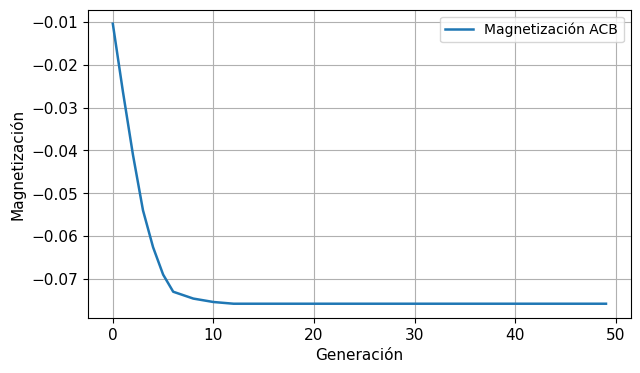

In [14]:
magnetizacion(automata)
graficar_magnetizacion(automata)